<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 6.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-02-28 19:20:02
-------------------
qualified stocks: 89
with latest results: 83
still star stocks: 45
-------------------
Initial Investment:  1.07 C
CY Investment:  1.20 C
Reserve:  1.48 L
Current:  1.06 C
-------------------
Today PnL: -2.39 L (-2.21%)
Current PnL: -27.68 L (-23.14%)
CY Booked + Current PnL: -13.81 L (-11.55%)
-------------------
Total profit:  1.46 L
Total loss:  -29.14 L
-------------------
Total Booked + Current PnL: -70.37 K (-0.66%)
Total Booked PnL: 26.98 L (25.33%)
Curr Year Booked PnL: 13.87 L (13.1%)
Prev Year Booked PnL: 13.11 L (12.31%)
Est FTT:  1.88 C
Est FTT PnL: 82.37 L (77.77%)
-------------------
Est LTT:  2.48 C
Est LTT PnL: 1.43 C (134.62%)
Deployed:  1.07 C
Current:  1.06 C
CAGR/XIRR %: -0.44%
Row successfully appended and saved to data/myPortfolioDB.csv.


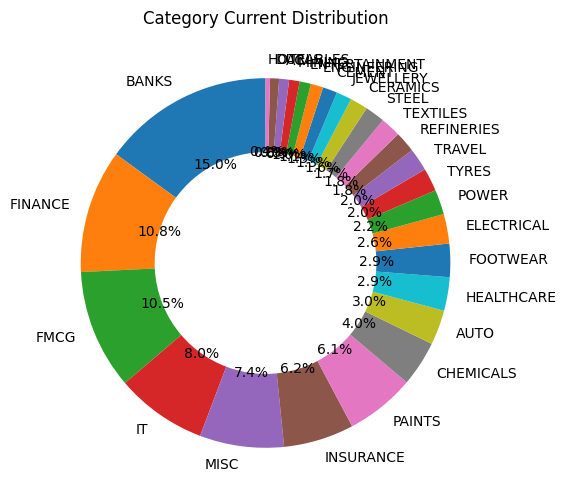

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'CapType', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
54,NMDC,65.62,82.00,28.21,M-MC,70.79,95594.0,-4805.0,29864.0,-4.16,...,31.24,24.96,507.0,-0.16,0.92,4.13,XY25,NTT,MC,MINING
11,AXISBANK,986.10,1317.30,-26.49,H-LC,94.38,103586.0,3004.0,30775.0,-0.11,...,29.71,33.59,NaN,0.10,0.99,7.11,X40,ATH,LC,BANKS
46,LICI,750.57,983.00,-26.80,H-LC,40.45,99227.0,-1349.0,32497.0,-0.08,...,32.75,30.97,202.0,-0.04,0.95,0.00,XY25,NTT,LC,INSURANCE
68,SBILIFE,1483.67,1928.65,-18.99,H-LC,82.58,97274.0,-3616.0,33871.0,-2.67,...,34.82,29.99,NaN,-0.11,0.93,6.85,AR,ATH,LC,INSURANCE
73,SIS,477.00,528.00,1.70,M-SC,78.65,51842.0,-29248.0,37917.0,-1.39,...,73.14,10.69,-28.0,-0.77,0.50,0.00,X40N,NTT,SC,MISC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,REPCOHOME,527.76,880.00,-28.68,H-SC,42.70,121954.0,-72789.0,202761.0,-3.33,...,166.26,66.74,-44.0,-0.36,1.17,2.56,XY24,NTT,SC,FINANCE
63,SAIL,130.64,228.00,58.98,M-MC,89.89,180844.0,-44118.0,211768.0,-0.91,...,117.10,74.53,-18.0,-0.21,1.73,5.00,XY24,BTT,MC,STEEL
58,RBLBANK,230.61,388.00,-24.86,M-SC,88.76,160873.0,-73427.0,233330.0,-2.78,...,145.04,68.25,-48.0,-0.31,1.54,5.94,XY24,NTT,SC,BANKS
12,BANDHANBNK,217.54,400.00,-39.27,H-SC,56.18,154885.0,-83756.0,283920.0,3.14,...,183.31,83.87,-29.0,-0.29,1.48,8.35,XY24,NTT,SC,BANKS


In [5]:
# Xceptional allocation
tmp_df = df_portfolio_features[df_portfolio_features['Conviction'].str.startswith('X-', na=False)]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
32,HAVELLS,1588.50,2077.12,-9.80,X-LC,61.80,89573.0,-10502.0,41284.0,-2.03,...,46.09,30.76,NaN,-0.25,0.86,0.00,X40,ATH,LC,ELECTRICAL
35,HINDUNILVR,2430.78,2723.00,-23.41,X-LC,48.31,183981.0,-20205.0,44744.0,-2.44,...,24.32,12.02,-3.0,-0.45,1.76,1.56,XY25,NTT,LC,FMCG
78,TATAELXSI,7332.28,9000.00,-30.10,X-MC,33.71,75755.0,-26897.0,50241.0,-2.73,...,66.32,22.74,-10.0,-0.54,0.73,0.00,X40N,NTT,MC,IT
50,MEDANTA,1022.60,1486.00,0.12,X-MC,100.00,174747.0,19312.0,51131.0,-3.65,...,29.26,45.32,8.0,0.38,1.67,18.90,XY24,NTT,MC,HEALTHCARE
20,CERA,9059.90,10420.45,-30.31,X-SC,28.09,52912.0,-37687.0,51293.0,-1.90,...,96.94,15.02,-57.0,-0.73,0.51,0.00,X40N,ATH,SC,CERAMICS
52,NESTLEIND,2225.87,2755.00,-20.74,X-LC,92.13,199258.0,-3296.0,51448.0,-3.89,...,25.82,23.77,NaN,-0.06,1.91,2.50,XY25,NTT,LC,FMCG
60,RELIANCE,1288.53,1526.00,-11.05,X-LC,67.42,189616.0,-13972.0,51500.0,-0.58,...,27.16,18.43,67.0,-0.27,1.82,0.00,XY25,NTT,LC,REFINERIES
55,PIDILITIND,2482.94,3576.00,-23.53,X-LC,53.93,154158.0,10147.0,53246.0,-0.72,...,34.54,44.02,10.0,0.19,1.48,0.00,X40,BTT,LC,CHEMICALS
72,SIEMENS,6028.45,7969.85,-26.42,X-LC,10.11,78600.0,-23884.0,56891.0,-1.35,...,72.38,32.20,NaN,-0.42,0.75,0.00,AR,ATH,LC,ELECTRICAL
80,TCS,4164.02,4998.00,-17.15,X-LC,29.21,135847.0,-26550.0,59080.0,-3.58,...,43.49,20.03,8.0,-0.45,1.30,0.00,X40,BTT,LC,IT


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
54,NMDC,65.62,82.0,28.21,M-MC,70.79,95594.0,-4805.0,29864.0,-4.16,...,31.24,24.96,507.0,-0.16,0.92,4.13,XY25,NTT,MC,MINING
46,LICI,750.57,983.0,-26.80,H-LC,40.45,99227.0,-1349.0,32497.0,-0.08,...,32.75,30.97,202.0,-0.04,0.95,0.00,XY25,NTT,LC,INSURANCE
35,HINDUNILVR,2430.78,2723.0,-23.41,X-LC,48.31,183981.0,-20205.0,44744.0,-2.44,...,24.32,12.02,-3.0,-0.45,1.76,1.56,XY25,NTT,LC,FMCG
69,SBIN,760.30,863.0,-30.44,M-LC,46.07,182532.0,-18948.0,46162.0,-2.15,...,25.29,13.51,93.0,-0.41,1.75,0.00,XY25,NTT,LC,BANKS
50,MEDANTA,1022.60,1486.0,0.12,X-MC,100.00,174747.0,19312.0,51131.0,-3.65,...,29.26,45.32,8.0,0.38,1.67,18.90,XY24,NTT,MC,HEALTHCARE
52,NESTLEIND,2225.87,2755.0,-20.74,X-LC,92.13,199258.0,-3296.0,51448.0,-3.89,...,25.82,23.77,NaN,-0.06,1.91,2.50,XY25,NTT,LC,FMCG
60,RELIANCE,1288.53,1526.0,-11.05,X-LC,67.42,189616.0,-13972.0,51500.0,-0.58,...,27.16,18.43,67.0,-0.27,1.82,0.00,XY25,NTT,LC,REFINERIES
66,SBICARD,765.91,1075.0,-10.51,H-MC,98.88,197118.0,17129.0,55508.0,-2.10,...,28.16,40.36,-1.0,0.31,1.89,26.73,XY24,NTT,MC,FINANCE
85,UNIONBANK,123.87,163.0,-21.09,M-LC,85.39,127458.0,-13382.0,57879.0,-2.63,...,45.41,31.59,-39.0,-0.23,1.22,10.72,XY24,NTT,LC,BANKS
15,BERGEPAINT,558.54,680.0,-29.29,H-MC,95.51,154870.0,-22187.0,60694.0,-3.31,...,39.19,21.75,-14.0,-0.37,1.48,10.78,XY24,NTT,MC,PAINTS


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
68,SBILIFE,1483.67,1928.65,-18.99,H-LC,82.58,97274.0,-3616.0,33871.0,-2.67,...,34.82,29.99,NaN,-0.11,0.93,6.85,AR,ATH,LC,INSURANCE
38,INDUSINDBK,1354.50,1800.00,-23.52,H-MC,97.75,56436.0,-20770.0,46165.0,-5.41,...,81.80,32.89,-21.0,-0.45,0.54,6.87,XR,NTT,MC,BANKS
49,MASFIN,326.60,399.50,-37.42,H-SC,65.17,70065.0,-27915.0,49788.0,-2.50,...,71.06,22.32,-74.0,-0.56,0.67,0.00,XR,ATH,SC,FINANCE
82,TRIDENT,37.35,48.00,36.84,M-SC,35.96,63701.0,-28554.0,54859.0,-3.15,...,86.12,28.51,-16.0,-0.52,0.61,0.00,XR,NTT,SC,TEXTILES
72,SIEMENS,6028.45,7969.85,-26.42,X-LC,10.11,78600.0,-23884.0,56891.0,-1.35,...,72.38,32.20,NaN,-0.42,0.75,0.00,AR,ATH,LC,ELECTRICAL
19,CAMS,3643.00,5250.99,-20.97,H-SC,22.47,88007.0,-13997.0,59017.0,-3.52,...,67.06,44.14,261.0,-0.24,0.84,16.22,XR,ATH,SC,MISC
24,DEN,52.79,75.00,-40.00,L-SC,17.98,50544.0,-33920.0,69458.0,-5.67,...,137.42,42.07,-21.0,-0.49,0.48,0.00,AR,NTT,SC,ENTERTAINMENT
45,LAOPALA,369.40,464.00,-34.33,H-SC,3.37,55446.0,-45400.0,71226.0,-4.49,...,128.46,25.61,-50.0,-0.64,0.53,0.00,AR,NTT,SC,CERAMICS
31,HATHWAY,19.74,31.40,1.07,L-SC,38.20,52880.0,-26080.0,72721.0,-3.64,...,137.52,59.07,-18.0,-0.36,0.51,0.00,XR,NTT,SC,ENTERTAINMENT
17,BSOFT,628.85,844.81,-20.99,M-SC,11.24,74209.0,-35840.0,73630.0,-5.70,...,99.22,34.34,-28.0,-0.49,0.71,0.00,XR,ATH,SC,IT


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,20.13
1,20,36.23
2,30,49.96


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,41.85
X40,14.89
X40N,11.77
AR,10.44
XR,9.29
XY25,9.11
X200,1.34
SR,1.28


In [10]:
# conviction-wise allocation
df_portfolio_features.groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
X-LC,22.29
M-SC,20.36
H-SC,18.42
M-MC,7.76
H-MC,6.57
M-LC,6.57
X-MC,6.57
H-LC,4.40
X-SC,2.89


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features.groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          11.54
X40       X-LC          10.22
XY24      H-SC           8.63
          H-MC           6.03
XY25      X-LC           5.49
X40N      H-SC           5.32
XY24      M-MC           5.20
          M-LC           4.82
AR        X-LC           4.04
X40N      M-SC           3.46
XR        M-SC           3.08
          H-SC           3.02
X40       H-LC           2.52
AR        X-MC           2.02
XY25      M-LC           1.75
X40N      X-MC           1.70
XY24      X-MC           1.67
AR        H-SC           1.45
X200      X-LC           1.34
X40N      X-SC           1.29
XY24      X-LC           1.20
X40       X-MC           1.18
          M-SC           0.97
XY24      L-SC           0.97
XY25      H-LC           0.95
XR        X-SC           0.94
AR        H-LC           0.93
XY25      M-MC           0.92
XR        L-SC           0.90
AR        M-MC           0.83
XR        M-MC           0.81
AR        M-SC           0.69
SR        X-SC           0.66
          M-SC           0.62
XR        H-MC           0.54
AR        L-SC           0.48
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.97,-18.39,72.73
FINANCE,10.80,-28.68,81.58
FMCG,10.46,-11.33,45.08
IT,7.99,-33.37,99.83
MISC,7.36,-31.38,77.00
INSURANCE,6.15,-6.56,56.70
PAINTS,6.06,-29.85,68.28
CHEMICALS,3.97,-30.51,116.51
AUTO,3.05,-29.80,86.87


In [13]:
# bucketX stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,77.8,8124447.0,-18.84,-1530892.0,65.16,5293828.0


In [14]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3502415.0
XR,1265668.0
X40N,1235985.0
AR,993034.0
X40,693809.0
XY25,256215.0
SR,211759.0
X200,77898.0


In [15]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,2332765.0
M-SC,2150750.0
X-LC,945794.0
M-MC,733466.0
X-SC,376084.0
H-MC,369381.0
M-LC,354116.0
L-SC,352162.0
X-MC,333262.0


In [16]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          1031305.0
          H-SC           984171.0
X40N      H-SC           576903.0
XY24      M-MC           529774.0
XR        M-SC           464095.0
X40       X-LC           447370.0
X40N      M-SC           414390.0
AR        H-SC           414054.0
XR        H-SC           357637.0
XY24      H-MC           323216.0
          M-LC           307954.0
AR        X-LC           211196.0
XR        L-SC           185465.0
XY25      X-LC           147692.0
XR        X-SC           128091.0
SR        X-SC           127996.0
X40N      X-MC           124695.0
          X-SC           119997.0
X40       H-LC           106648.0
XY24      L-SC            97239.0
AR        X-MC            90263.0
          M-MC            89613.0
          M-SC            84579.0
XR        M-MC            84215.0
SR        M-SC            83763.0
X200      X-LC            77898.0
X40       M-SC            72618.0
AR        L-SC            69458.0
X40       X-MC            67173.0
XY24      X-LC            61638.0
          X-MC            51131.0
XR        H-MC            46165.0
XY25      M-LC            46162.0
AR        H-LC            33871.0
XY25      H-LC            32497.0
          M-MC            29864.0
Name: FTT Amt, dtype: float64

In [17]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,22
H-SC,18
X-LC,14
M-MC,7
M-LC,5
H-MC,5
X-MC,5
H-LC,4
X-SC,4
